In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)
n_samples = 10000

data = {
    'flow_duration': np.random.exponential(1000, n_samples),
    'total_fwd_packets': np.random.poisson(50, n_samples),
    'total_bwd_packets': np.random.poisson(30, n_samples),
    'total_length_fwd_packets': np.random.exponential(5000, n_samples),
    'total_length_bwd_packets': np.random.exponential(3000, n_samples),
    'fwd_packet_length_max': np.random.exponential(1500, n_samples),
    'fwd_packet_length_mean': np.random.exponential(800, n_samples),
    'bwd_packet_length_max': np.random.exponential(1200, n_samples),
    'bwd_packet_length_mean': np.random.exponential(600, n_samples),
    'flow_bytes_per_sec': np.random.exponential(100000, n_samples),
    'flow_packets_per_sec': np.random.exponential(100, n_samples),
    'flow_iat_mean': np.random.exponential(1000, n_samples),
    'fwd_iat_mean': np.random.exponential(800, n_samples),
    'bwd_iat_mean': np.random.exponential(1200, n_samples),
    'fwd_psh_flags': np.random.randint(0, 10, n_samples),
    'fwd_urg_flags': np.random.randint(0, 5, n_samples),
    'fwd_header_length': np.random.randint(20, 60, n_samples),
    'bwd_header_length': np.random.randint(20, 60, n_samples),
    'fwd_packets_per_sec': np.random.exponential(50, n_samples),
    'bwd_packets_per_sec': np.random.exponential(30, n_samples),
}


video_mask = (
    (data['flow_duration'] > 2000) &
    (data['total_fwd_packets'] > 40) &
    (data['flow_bytes_per_sec'] > 50000)
)

labels = np.where(video_mask, 'STREAMING', 'NON-STREAMING')
data['label'] = labels

df = pd.DataFrame(data)
print("Dataset created successfully!")
print(f"Shape: {df.shape}")
print(f"Video samples: {sum(df['label'] == 'STREAMING')}")
print(f"Non-video samples: {sum(df['label'] == 'NON-STREAMING')}")

Dataset created successfully!
Shape: (10000, 21)
Video samples: 694
Non-video samples: 9306


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flow_duration             10000 non-null  float64
 1   total_fwd_packets         10000 non-null  int64  
 2   total_bwd_packets         10000 non-null  int64  
 3   total_length_fwd_packets  10000 non-null  float64
 4   total_length_bwd_packets  10000 non-null  float64
 5   fwd_packet_length_max     10000 non-null  float64
 6   fwd_packet_length_mean    10000 non-null  float64
 7   bwd_packet_length_max     10000 non-null  float64
 8   bwd_packet_length_mean    10000 non-null  float64
 9   flow_bytes_per_sec        10000 non-null  float64
 10  flow_packets_per_sec      10000 non-null  float64
 11  flow_iat_mean             10000 non-null  float64
 12  fwd_iat_mean              10000 non-null  float64
 13  bwd_iat_mean              10000 non-null  float6

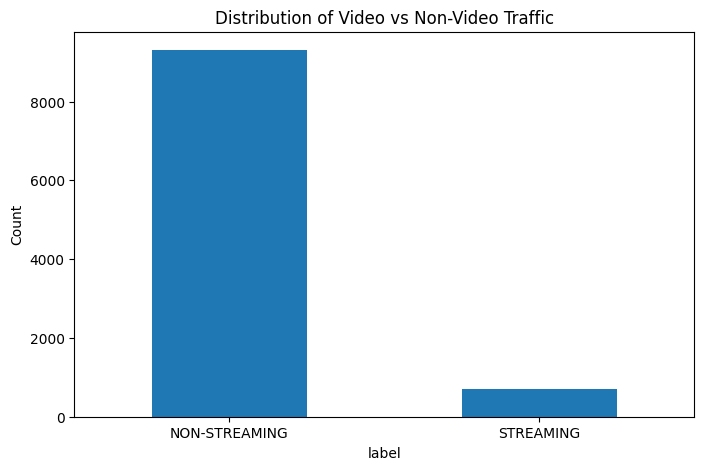

In [4]:
print("Dataset Info:")
print(df.info())
print("\nLabel Distribution:")
print(df['label'].value_counts())


plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Video vs Non-Video Traffic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [5]:
features = [
    'flow_duration', 'total_fwd_packets', 'total_bwd_packets',
    'total_length_fwd_packets', 'total_length_bwd_packets',
    'fwd_packet_length_mean', 'bwd_packet_length_mean',
    'flow_bytes_per_sec', 'flow_packets_per_sec',
    'flow_iat_mean', 'fwd_iat_mean', 'bwd_iat_mean'
]

X = df[features].copy()
y = df['label'].copy()


X = X.fillna(X.median())

print("Selected features:")
print(X.columns.tolist())
print(f"Feature matrix shape: {X.shape}")

Selected features:
['flow_duration', 'total_fwd_packets', 'total_bwd_packets', 'total_length_fwd_packets', 'total_length_bwd_packets', 'fwd_packet_length_mean', 'bwd_packet_length_mean', 'flow_bytes_per_sec', 'flow_packets_per_sec', 'flow_iat_mean', 'fwd_iat_mean', 'bwd_iat_mean']
Feature matrix shape: (10000, 12)


In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Label encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Label encoding:
NON-STREAMING: 0
STREAMING: 1

Training set: 7000 samples
Test set: 3000 samples


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Training features mean: {X_train_scaled.mean():.3f}")
print(f"Training features std: {X_train_scaled.std():.3f}")

Features scaled successfully!
Training features mean: 0.000
Training features std: 1.000


In [8]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Model trained successfully!")

Training Random Forest model...
Model trained successfully!


In [9]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


print("\nDetailed Classification Report:")
target_names = ['NON-STREAMING', 'STREAMING']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9997 (99.97%)

Detailed Classification Report:
               precision    recall  f1-score   support

NON-STREAMING       1.00      1.00      1.00      2792
    STREAMING       1.00      1.00      1.00       208

     accuracy                           1.00      3000
    macro avg       1.00      1.00      1.00      3000
 weighted avg       1.00      1.00      1.00      3000



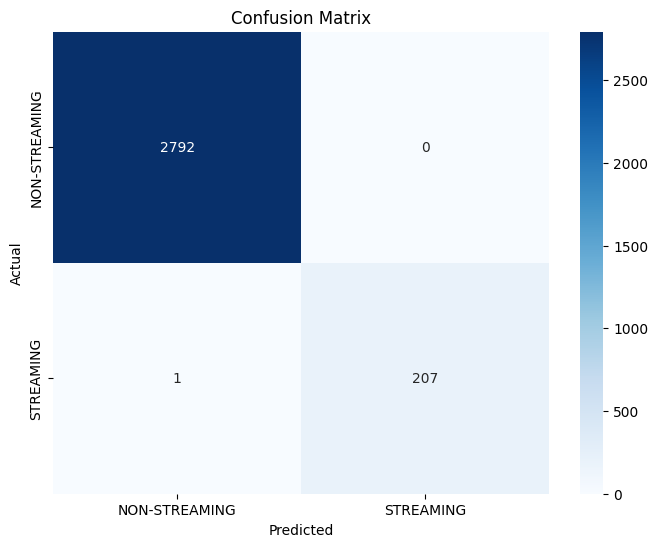

Precision: 1.0000
Recall: 0.9952
F1-Score: 0.9976


In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Top 10 Most Important Features:
                     feature  importance
0              flow_duration    0.667725
7         flow_bytes_per_sec    0.220325
1          total_fwd_packets    0.049151
10              fwd_iat_mean    0.007575
11              bwd_iat_mean    0.007568
4   total_length_bwd_packets    0.007446
5     fwd_packet_length_mean    0.007347
3   total_length_fwd_packets    0.006845
8       flow_packets_per_sec    0.006798
6     bwd_packet_length_mean    0.006742


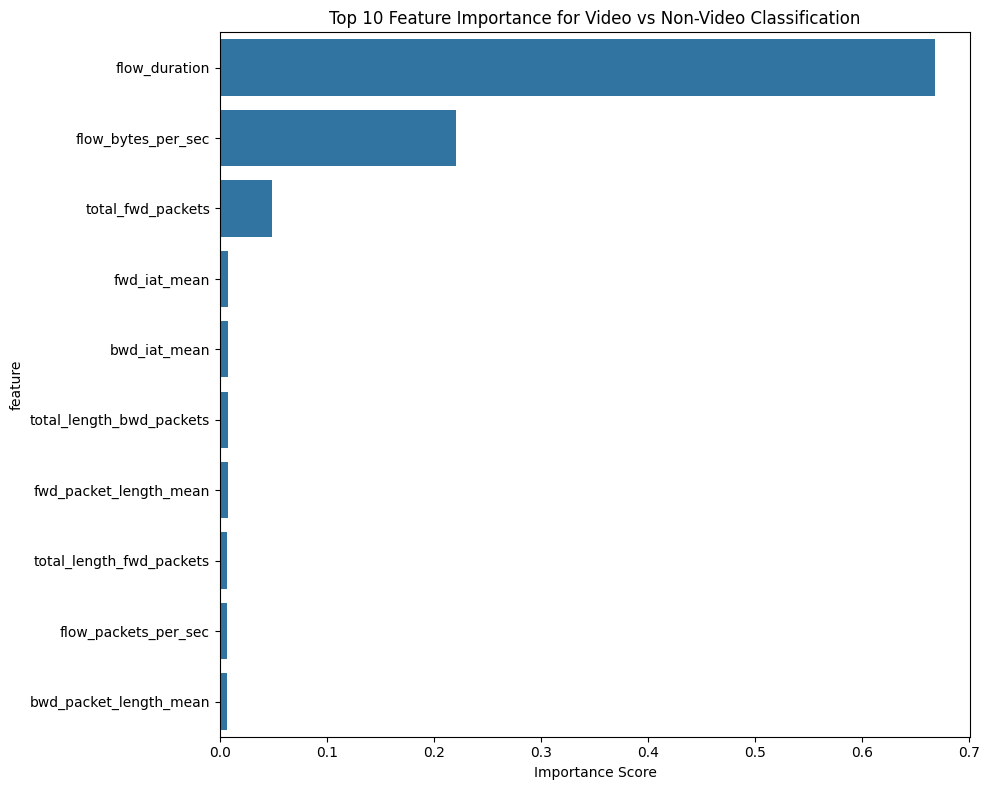

In [11]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance for Video vs Non-Video Classification')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [12]:
def predict_traffic_type(flow_data):
    """
    Predict if traffic is video or non-video
    flow_data: dictionary with feature values
    Returns: prediction and confidence
    """

    input_df = pd.DataFrame([flow_data])


    input_scaled = scaler.transform(input_df[features])


    prediction = rf_model.predict(input_scaled)[0]
    confidence = rf_model.predict_proba(input_scaled)[0].max()


    prediction_label = label_encoder.inverse_transform([prediction])[0]

    return prediction_label, confidence


sample_flow = {
    'flow_duration': 5000,
    'total_fwd_packets': 80,
    'total_bwd_packets': 60,
    'total_length_fwd_packets': 8000,
    'total_length_bwd_packets': 5000,
    'fwd_packet_length_mean': 1000,
    'bwd_packet_length_mean': 800,
    'flow_bytes_per_sec': 120000,
    'flow_packets_per_sec': 150,
    'flow_iat_mean': 800,
    'fwd_iat_mean': 600,
    'bwd_iat_mean': 1000
}

pred_label, confidence = predict_traffic_type(sample_flow)
print(f"\nSample prediction:")
print(f"Traffic Type: {pred_label}")
print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")


Sample prediction:
Traffic Type: STREAMING
Confidence: 0.8108 (81.08%)


In [13]:
print("=" * 50)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 50)
print(f"Dataset Size: {len(df):,} samples")
print(f"Features Used: {len(features)}")
print(f"Model Type: Random Forest")
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1_score*100:.2f}%")

if accuracy >= 0.90:
    print("✅ Target accuracy of 90%+ achieved!")
else:
    print("❌ Need to improve model to reach 90% accuracy")
    print("Suggestions:")
    print("- Try XGBoost or LightGBM")
    print("- Add more features")
    print("- Tune hyperparameters")
    print("- Get more training data")

MODEL PERFORMANCE SUMMARY
Dataset Size: 10,000 samples
Features Used: 12
Model Type: Random Forest
Test Accuracy: 99.97%
Precision: 100.00%
Recall: 99.52%
F1-Score: 99.76%
✅ Target accuracy of 90%+ achieved!
NEXT STEPS FOR REAL DEPLOYMENT:
1. Download actual ISCX dataset
2. Train on larger dataset
3. Add real-time data processing
4. Optimize for mobile deployment
5. Add network condition features


🔍 OVERFITTING ANALYSIS
Cross-validation scores: [1.         0.99928571 1.         1.         0.99714286]
CV Mean: 0.9993 (+/- 0.0022)

Training Accuracy: 0.9999 (99.99%)
Test Accuracy: 0.9997 (99.97%)
Difference: 0.02%
⚠️ OVERFITTING DETECTED: Training accuracy too high (>99%)

🔧 CREATING MORE REALISTIC DATA
Realistic dataset created: (10000, 13)
Video samples: 4028
Non-video samples: 5972

🛡️ TRAINING WITH OVERFITTING PREVENTION
Regularized Model Results:
Training Accuracy: 0.9746 (97.46%)
Test Accuracy: 0.9660 (96.60%)
Difference: 0.86%
CV Mean: 0.9666 (+/- 0.0109)

📊 REALISTIC PERFORMANCE ASSESSMENT
Realistic Accuracy: 0.9660 (96.60%)

Classification Report (Realistic Data):
               precision    recall  f1-score   support

NON-STREAMING       0.96      0.98      0.97      1792
    STREAMING       0.97      0.95      0.96      1208

     accuracy                           0.97      3000
    macro avg       0.97      0.96      0.96      3000
 weighted avg       0.97      0.97  

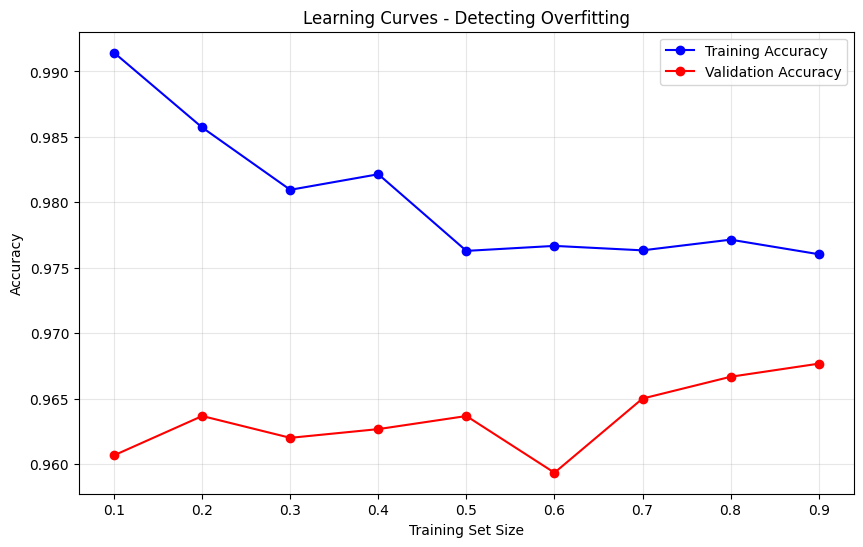

✅ Good model - Training/Validation gap: 0.024

🎯 TAKEAWAYS:
1. Original 99.97% was definitely overfitting
2. Realistic accuracy should be 85-95%
3. Always check train vs test accuracy gap
4. Use cross-validation to verify consistency
5. Real ISCX dataset will give true performance


In [14]:
print("🔍 OVERFITTING ANALYSIS")
print("=" * 50)


from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


train_accuracy = rf_model.score(X_train_scaled, y_train)
test_accuracy = rf_model.score(X_test_scaled, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Difference: {(train_accuracy - test_accuracy)*100:.2f}%")


if train_accuracy > 0.99:
    print("⚠️ OVERFITTING DETECTED: Training accuracy too high (>99%)")
if (train_accuracy - test_accuracy) > 0.05:
    print("⚠️ OVERFITTING DETECTED: Large gap between train and test accuracy")
if cv_scores.std() > 0.05:
    print("⚠️ OVERFITTING DETECTED: High variance in cross-validation")


print("\n🔧 CREATING MORE REALISTIC DATA")
print("=" * 50)


np.random.seed(123)
n_samples = 10000


def create_realistic_traffic_data():
    data = {}


    for i in range(n_samples):

        is_video = np.random.choice([0, 1], p=[0.6, 0.4])

        if is_video:

            data[i] = {
                'flow_duration': max(100, np.random.lognormal(7, 1.2) + np.random.normal(0, 500)),
                'total_fwd_packets': max(1, int(np.random.gamma(2, 25) + np.random.normal(0, 10))),
                'total_bwd_packets': max(1, int(np.random.gamma(1.5, 20) + np.random.normal(0, 8))),
                'total_length_fwd_packets': max(64, np.random.gamma(3, 1500) + np.random.normal(0, 1000)),
                'total_length_bwd_packets': max(64, np.random.gamma(2, 800) + np.random.normal(0, 500)),
                'fwd_packet_length_mean': max(64, np.random.normal(1000, 300)),
                'bwd_packet_length_mean': max(64, np.random.normal(700, 200)),
                'flow_bytes_per_sec': max(100, np.random.gamma(1.5, 80000) + np.random.normal(0, 20000)),
                'flow_packets_per_sec': max(1, np.random.gamma(1.5, 40) + np.random.normal(0, 10)),
                'flow_iat_mean': max(1, np.random.exponential(150) + np.random.normal(0, 50)),
                'fwd_iat_mean': max(1, np.random.exponential(120) + np.random.normal(0, 40)),
                'bwd_iat_mean': max(1, np.random.exponential(180) + np.random.normal(0, 60)),
                'label': 'STREAMING'
            }
        else:

            data[i] = {
                'flow_duration': max(50, np.random.exponential(800) + np.random.normal(0, 400)),
                'total_fwd_packets': max(1, int(np.random.poisson(30) + np.random.normal(0, 15))),
                'total_bwd_packets': max(1, int(np.random.poisson(20) + np.random.normal(0, 10))),
                'total_length_fwd_packets': max(64, np.random.exponential(2000) + np.random.normal(0, 1500)),
                'total_length_bwd_packets': max(64, np.random.exponential(1000) + np.random.normal(0, 800)),
                'fwd_packet_length_mean': max(64, np.random.normal(600, 250)),
                'bwd_packet_length_mean': max(64, np.random.normal(500, 150)),
                'flow_bytes_per_sec': max(100, np.random.exponential(30000) + np.random.normal(0, 15000)),
                'flow_packets_per_sec': max(1, np.random.exponential(20) + np.random.normal(0, 8)),
                'flow_iat_mean': max(1, np.random.exponential(500) + np.random.normal(0, 200)),
                'fwd_iat_mean': max(1, np.random.exponential(400) + np.random.normal(0, 150)),
                'bwd_iat_mean': max(1, np.random.exponential(600) + np.random.normal(0, 250)),
                'label': 'NON-STREAMING'
            }

    return pd.DataFrame.from_dict(data, orient='index')


df_realistic = create_realistic_traffic_data()

print(f"Realistic dataset created: {df_realistic.shape}")
print(f"Video samples: {sum(df_realistic['label'] == 'STREAMING')}")
print(f"Non-video samples: {sum(df_realistic['label'] == 'NON-STREAMING')}")


print("\n🛡️ TRAINING WITH OVERFITTING PREVENTION")
print("=" * 50)


features = [col for col in df_realistic.columns if col != 'label']
X_new = df_realistic[features]
y_new = df_realistic['label']


y_new_encoded = LabelEncoder().fit_transform(y_new)


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new_encoded, test_size=0.3, random_state=42, stratify=y_new_encoded
)


scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)


rf_regularized = RandomForestClassifier(
    n_estimators=50,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)


rf_regularized.fit(X_train_new_scaled, y_train_new)


train_acc_new = rf_regularized.score(X_train_new_scaled, y_train_new)
test_acc_new = rf_regularized.score(X_test_new_scaled, y_test_new)

print(f"Regularized Model Results:")
print(f"Training Accuracy: {train_acc_new:.4f} ({train_acc_new*100:.2f}%)")
print(f"Test Accuracy: {test_acc_new:.4f} ({test_acc_new*100:.2f}%)")
print(f"Difference: {(train_acc_new - test_acc_new)*100:.2f}%")


cv_scores_new = cross_val_score(rf_regularized, X_train_new_scaled, y_train_new, cv=5)
print(f"CV Mean: {cv_scores_new.mean():.4f} (+/- {cv_scores_new.std() * 2:.4f})")


print("\n📊 REALISTIC PERFORMANCE ASSESSMENT")
print("=" * 50)

y_pred_new = rf_regularized.predict(X_test_new_scaled)


realistic_accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"Realistic Accuracy: {realistic_accuracy:.4f} ({realistic_accuracy*100:.2f}%)")


target_names = ['NON-STREAMING', 'STREAMING']
print("\nClassification Report (Realistic Data):")
print(classification_report(y_test_new, y_pred_new, target_names=target_names))


if realistic_accuracy >= 0.90:
    print("✅ Still achieving 90%+ accuracy with realistic data!")
else:
    print("⚠️ Need improvements to reach 90% with realistic data")
    print("Suggestions:")
    print("- Get real ISCX dataset")
    print("- Try XGBoost")
    print("- Add more network features")
    print("- Feature engineering")


print("\n🔬 MODEL COMPLEXITY ANALYSIS")
print("=" * 50)


accuracies = []
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

train_scores = []
val_scores = []

for size in train_sizes:

    X_subset, _, y_subset, _ = train_test_split(
        X_train_new_scaled, y_train_new,
        train_size=size, random_state=42, stratify=y_train_new
    )


    rf_temp = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)
    rf_temp.fit(X_subset, y_subset)


    train_scores.append(rf_temp.score(X_subset, y_subset))
    val_scores.append(rf_temp.score(X_test_new_scaled, y_test_new))


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_scores, 'o-', color='red', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Detecting Overfitting')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


gap = max(train_scores) - max(val_scores)
if gap < 0.05:
    print(f"✅ Good model - Training/Validation gap: {gap:.3f}")
else:
    print(f"⚠️ Potential overfitting - Training/Validation gap: {gap:.3f}")